In [1]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
import tensorflow as tf

In [2]:
train_path="E:/SBIR/Selected/train"
test_path="E:/SBIR/Selected/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [3]:
print(class_names)
print(class_names_test)

['airplane', 'apple', 'banana', 'bicycle', 'car', 'dog', 'door', 'ladder', 'moon', 'sheep', 'table', 'tree', 'wheel']
['airplane', 'apple', 'banana', 'bicycle', 'car', 'dog', 'door', 'ladder', 'moon', 'sheep', 'table', 'tree', 'wheel']


In [4]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [5]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(180, 180),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path,target_size=(180,180),batch_size=32,shuffle=False,class_mode='categorical')

Found 780 images belonging to 13 classes.
Found 260 images belonging to 13 classes.


In [6]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="E:/SBIR/Selected/train",target_size=(180,180))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="E:/SBIR/Selected/test", target_size=(180,180))

Found 780 images belonging to 13 classes.
Found 260 images belonging to 13 classes.


In [7]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=13,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(13, activation='softmax'))

94765736/94765736 [==============================] - 82s 1us/step


In [8]:

resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 13)                6669      
                                                                 
Total params: 24,643,469
Trainable params: 1,055,757
Non-trainable params: 23,587,712
_________________________________________________________________


In [10]:
from keras.optimizers import Adam

resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

e:\Ana\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
H = resnet_model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[es])

C:\Users\Yahya Akel\AppData\Local\Temp\ipykernel_9280\4096127426.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = resnet_model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[es])


Epoch 1/100
25/25 [==============================] - 38s 2s/step - loss: 0.5014 - accuracy: 0.8295 - val_loss: 0.8105 - val_accuracy: 0.6923
Epoch 2/100
25/25 [==============================] - 39s 2s/step - loss: 0.3982 - accuracy: 0.8744 - val_loss: 0.6083 - val_accuracy: 0.7962
Epoch 3/100
25/25 [==============================] - 38s 2s/step - loss: 0.3262 - accuracy: 0.8910 - val_loss: 0.5067 - val_accuracy: 0.8308
Epoch 4/100
25/25 [==============================] - 38s 2s/step - loss: 0.3829 - accuracy: 0.8718 - val_loss: 0.6552 - val_accuracy: 0.7808
Epoch 5/100
25/25 [==============================] - 39s 2s/step - loss: 0.2859 - accuracy: 0.9103 - val_loss: 0.4975 - val_accuracy: 0.8423
Epoch 6/100
25/25 [==============================] - 38s 2s/step - loss: 0.2895 - accuracy: 0.9051 - val_loss: 0.5297 - val_accuracy: 0.8231
Epoch 7/100
25/25 [==============================] - 38s 2s/step - loss: 0.2673 - accuracy: 0.9090 - val_loss: 0.4663 - val_accuracy: 0.8500
Epoch 8/100
2

In [16]:
import pickle
with open('model_resnet50commp.pkl', 'wb') as file:
      pickle.dump(resnet_model, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\functional
......vars
...layers\functional\layers\activation
......vars
...layers\functional\layers\activation_1
......vars
...layers\functional\layers\activation_10
......vars
...layers\functional\layers\activation_11
......vars
...layers\functional\layers\activation_12
......vars
...layers\functional\layers\activation_13
......vars
...layers\functional\layers\activation_14
......vars
...layers\functional\layers\activation_15
......vars
...layers\functional\layers\activation_16
......vars
...layers\functional\layers\activation_17
......vars
...layers\functional\layers\activation_18
......vars
...layers\functional\layers\activation_19
......vars
...layers\functional\layers\activation_2
......vars
...layers\functional\layers\activation_20
......vars
...layers\functional\layers\activati

In [13]:
# Renders the charts for training accuracy and loss.
import matplotlib.pyplot as plt
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

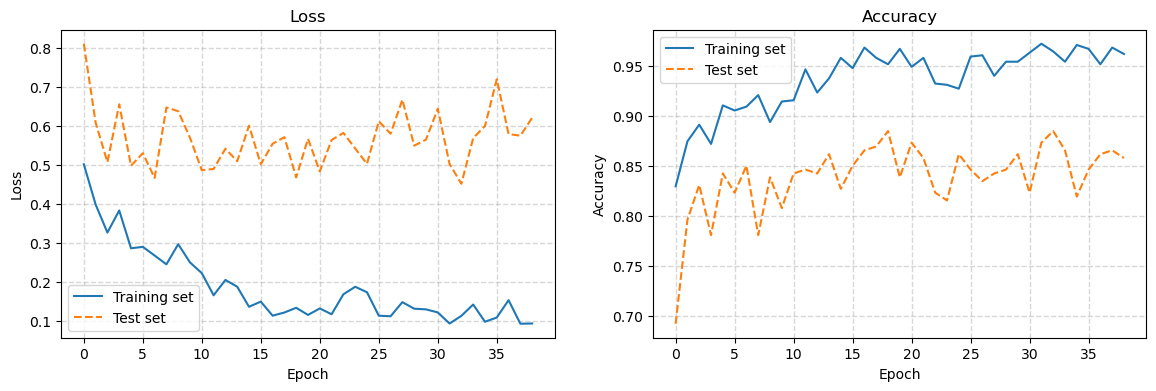

In [14]:
render_training_history(H)

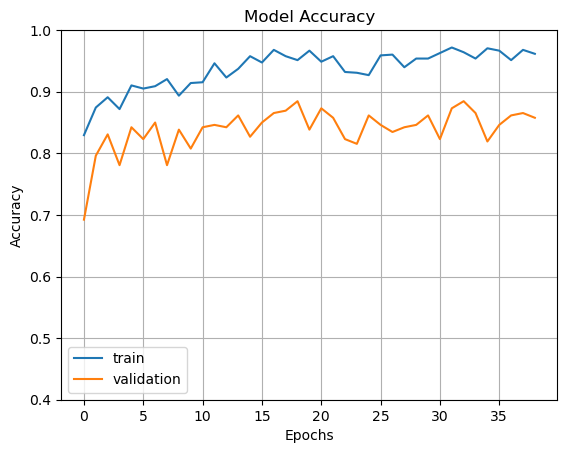

In [15]:
fig1 = plt.gcf()
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()